<h1 style="font-size:3rem;color:orange;">Homework 3</h1>

# Problem 3

In this problem, you will build use unsupervised learning methods to analyze the
Fashion-MNIST dataset. The Fashion-MNIST dataset provided here consists of 60,000 images of clothing.
Each observation is a 28×28 pixel grayscale image, so each observation has 282 = 784 dimensions. There
are 10 types of clothing in the dataset. The first column of the data matrix is the label of the observation,
and all other columns are pixel intensities. You can find more details here.

(a) Load the dataset. For this problem, you don’t need to rescale the features, because all pixels are
already on the same intensity scale. Separate the image and label information and randomly select
5000 observations to use in the model (the selection of random observations is to reduce computational
cost).

In [28]:
#%% Import data into dataframe and split
import pandas as pa;
import timeit;

file_path = 'C:/Users/danma/Documents/STA 4365/HW3/fashion-mnist_train.csv'
df = pa.read_csv(file_path)

#creates small dataframe 
sm_df = df.sample(frac = .08333, random_state = 50)
labels = sm_df.filter(regex='label')
pixels = sm_df.filter(regex='pixel')

print(sm_df.head())
print(labels.head())
print(pixels.head())

del file_path

       label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
6820       2       0       0       0       0       0       0       0       0   
11854      2       0       0       0       0       0       0       0       0   
9635       8       0       0       0       0       0       0       0       0   
45077      2       0       0       0       0       0       0       0       0   
18764      9       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
6820        0  ...         0         0         0         0         0   
11854       0  ...         0         0         0         7        60   
9635        0  ...         0         0         0         0         0   
45077       0  ...         0         0         0         0         0   
18764       0  ...         0         0         0         0         0   

       pixel780  pixel781  pixel782  pixel783  pixel784  
6820          0        28   

(b) Learn a K-means model using the K-means++ initialization method with K = 10 clusters from your
5000 observations. Visualize 10 images from each cluster.


labels:
 [2 2 6 ... 8 4 7]
shape:
 (10, 784)


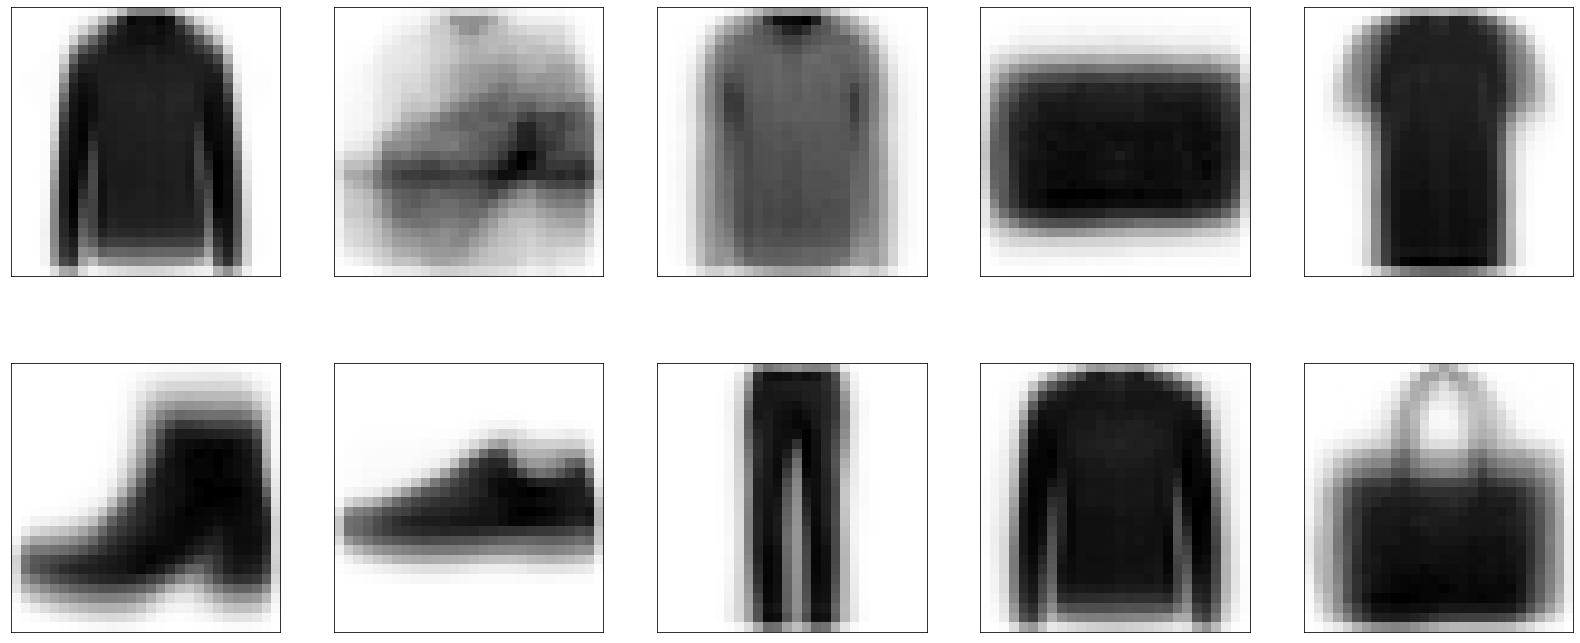

In [29]:
#%% learn kmeans model using the kmeans++ initialization methods k=10
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=10, random_state=0).fit(pixels)
clst = kmeans.labels_
print('labels:\n',clst)
shape = kmeans.cluster_centers_.shape
print('shape:\n',shape)

fig, ax = plt.subplots(2, 5, figsize=(28, 12))
centers = kmeans.cluster_centers_.reshape(10, 28, 28)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

(c) Learn a 2D t-SNE embedding of the observed data. Use a perplexity of 30, and do PCA pre-processing
to reduce the feature size to 50 dimensions before learning the t-SNE model. Using your embeddings,
make two plots with identical embedding dimensions and different color codings: one where color shows
the ground truth labels, and one where color shows your K-means cluster labels from the previous part.
Describe how well the clusters from the previous part reflect the ground truth labels and the geometric
relations identified by t-SNE.

In [30]:
#%% use PCA before learning t-SNE model and creating two plots
from sklearn.decomposition import PCA

pca = PCA(n_components=50)

principalComponents = pca.fit_transform(pixels)
principalDf = pa.DataFrame(principalComponents)

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, learning_rate='auto', init='pca')
tsne_proj = tsne.fit_transform(principalDf)

# Create DF
embeddingsdf = pa.DataFrame()
# Add game names
embeddingsdf['label'] = labels
# Add x coordinate
embeddingsdf['x'] = tsne_proj[:,0]
# Add y coordinate
embeddingsdf['y'] = tsne_proj[:,1]
# Check
embeddingsdf.head()

C:\Users\danma\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


,label,x,y
6820,2,134.030151,490.642731
11854,2,-696.786011,-282.936523
9635,8,-1115.756348,532.612549
45077,2,1529.529175,329.264069
18764,9,-586.007751,1495.189819


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


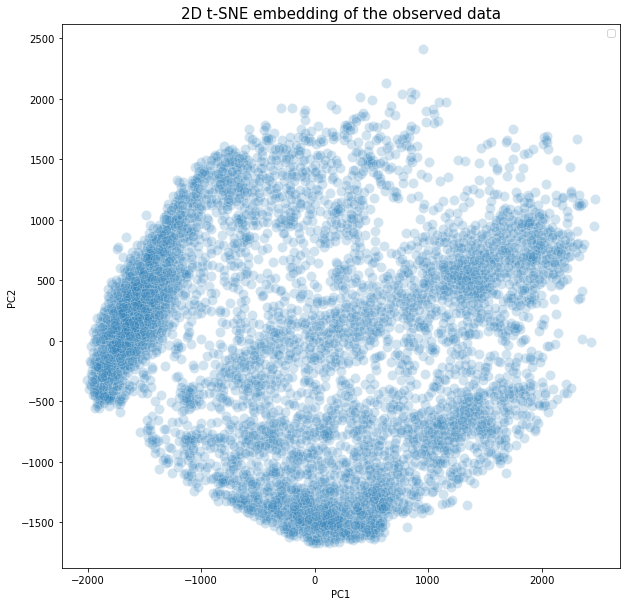

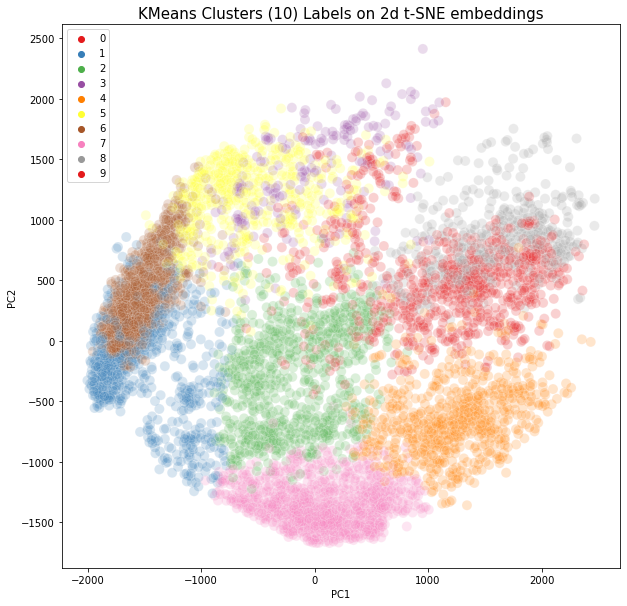

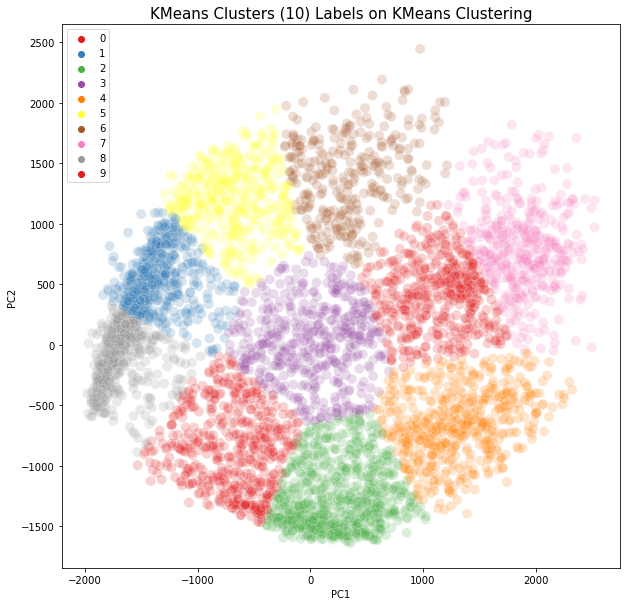

In [31]:
#%% Plotting
import seaborn as sns
plt.figure(figsize = (10,10))
sns.scatterplot(x=embeddingsdf.x, y=embeddingsdf.y,
                palette='Set1',
                s=100, alpha=0.2).set_title('2D t-SNE embedding of the observed data', fontsize=15)
plt.legend()
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

###PLOT FIGURES FOR TSNE

import seaborn as sns

labels_scale = kmeans.labels_

plt.figure(figsize = (10,10))
sns.scatterplot(x=tsne_proj[:,0], y=tsne_proj[:,1], 
                hue=labels_scale, 
                palette='Set1',
                s=100, alpha=0.2).set_title('KMeans Clusters (10) Labels on 2d t-SNE embeddings', fontsize=15)
plt.legend()
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

###PLOT FIGURES FOR KMEANS
pca = PCA(2)

df = pca.fit_transform(pixels)

kmeans = KMeans(n_clusters=10, random_state=0)
label = kmeans.fit_predict(df)

labels_scale = kmeans.labels_

plt.figure(figsize = (10,10))
sns.scatterplot(x=df[:,0], y=df[:,1], 
                hue=labels_scale, 
                palette='Set1',
                s=100, alpha=0.2).set_title('KMeans Clusters (10) Labels on KMeans Clustering', fontsize=15)
plt.legend()
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

<b style="font-size:1.5rem;color:red;">It appears that the KMeans clustering is effective in all but 2 of the ground truth labels for t-SNE.<br>Looking at cluster 1 and 6 on the t-SNE plot, we can see that KMeans cannot account for the overlap.<br>This can be seen by looking at cluster 1 and 8 on the KMeans plot.<br>This accounts for the image processing error where one image overlaps two, as seen on the 2nd image from part (a).</b>